In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats
import re

## Part 2: Import the raw data and check data

In [2]:
skills=pd.read_csv('job_skills.csv')

In [3]:
# Use .head() and .tail() to check the first and last five observations
skills.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
skills.tail()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...
1249,Google,Physical Security Manager,Real Estate & Workplace Services,"Wrocław, Poland",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [5]:
# Use.info() to check the number of observations, column types and NAN value
skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1250 non-null object
Title                       1250 non-null object
Category                    1250 non-null object
Location                    1250 non-null object
Responsibilities            1235 non-null object
Minimum Qualifications      1236 non-null object
Preferred Qualifications    1236 non-null object
dtypes: object(7)
memory usage: 68.4+ KB


## Part 3: Simple Descriptive Analysis

### 3.1 Job by Company name

There are 1227 jobs from Google and 23 from its Subsidiary Youtube


In [6]:
skills['Company'].value_counts()

Google     1227
YouTube      23
Name: Company, dtype: int64

### 3.2 By job category

The top category are from Sales & Account Management, Marketing & Communications, Finance and Technical Solutions

Sales & Account Management    168
Marketing & Communications    165
Finance                       115
Technical Solutions           101
Business Strategy              98
People Operations              86
User Experience & Design       84
Program Management             74
Partnerships                   60
Product & Customer Support     50
Name: Category, dtype: int64


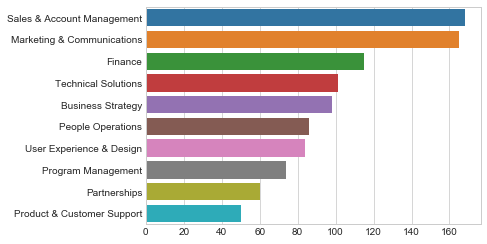

In [7]:
top_10_category=skills['Category'].value_counts().head(10)
print(top_10_category)

# Use seaborn.barplot to visualize the top 10 Job Categories
sns.barplot(x=top_10_category.values, y=top_10_category.index, orient='h')

### 3.3 By Location

Mountain View, CA, United States    190
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          70
London, United Kingdom               62
San Francisco, CA, United States     49
Singapore                            41
Tokyo, Japan                         31
Sydney, Australia                    31
San Bruno, CA, United States         28
Name: Location, dtype: int64


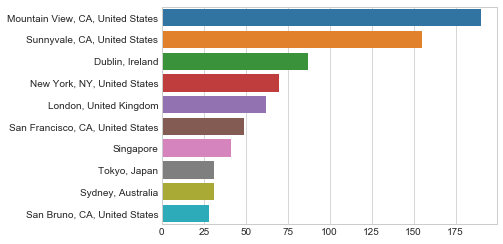

In [8]:
# Check the top 10 location
top_10_location=skills['Location'].value_counts().head(10)
print(top_10_location)
sns.barplot(x=top_10_location.values, y=top_10_location.index, orient='h')
# The top 3 Job locations are Mountain View which is the headquarter, Sunnyvalue, and Durbin.

In [9]:
# Check why Sunnyvale has a lot of job opening
job_sunnyvale=skills[skills['Location']=='Sunnyvale, CA, United States']
# it looks like many of the jobs at the Sunnyvale location are related to Google Cloud
print(job_sunnyvale.shape)
job_sunnyvale.head()

(155, 7)


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
7,Google,"Strategic Technology Partner Manager, Healthca...",Partnerships,"Sunnyvale, CA, United States",Lead the development and strategy with partner...,BA/BS degree or equivalent practical experienc...,"BA/BS degree in a technical, life sciences or ..."
19,Google,"Technical Program Manager, ASIC Development",Program Management,"Sunnyvale, CA, United States","Plan, coordinate, and deliver platforms hardwa...","BS degree in Electrical Engineering, Computer ...",Master's or PhD degree in engineering.\nExperi...
23,Google,"Survey Lead, Google Cloud Support",Product & Customer Support,"Sunnyvale, CA, United States",Develop and track core metrics across all Goog...,BA/BS degree in a technical or quantitative/bu...,"MBA, MS or PhD degree in a related or quantita..."
24,Google,"Technical Trainer Manager, Google Cloud",Program Management,"Sunnyvale, CA, United States",Manage a global team of Technical Trainers.\nG...,7 years of experience in a Technical Training ...,"Experience with Cloud Infrastructure, Data and..."


In [10]:
# Let's check how many jobs has Title or Responsibilities mentions Google Cloud for job_sunnyvale
cloudrelated=[]
job_sunnyvale.reset_index(inplace=True)
title=job_sunnyvale['Title'].str.lower()
res=job_sunnyvale['Responsibilities'].str.lower()

for i in range(len(title)):
        if re.findall('google cloud', title[i], flags=0): 
            cloudrelated.append(1)
        elif re.findall('google cloud', res[i], flags=0):
            cloudrelated.append(1)
        else:
            cloudrelated.append(0)
cloudrelated=pd.Series(cloudrelated)  

job_sunnyvale['cloudrelated']=cloudrelated
print(job_sunnyvale['cloudrelated'].value_counts())
print(job_sunnyvale['cloudrelated'].sum()/job_sunnyvale['cloudrelated'].count())
# As we can see 39% of the jobs at Google Sunnyvale location mentioned Google cloud in the Job Title or description

0    94
1    61
Name: cloudrelated, dtype: int64
0.3935483870967742


C:\Users\zhang\Anaconda3 new\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### 3.4 Check the most popular language at Google

language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 
                            'sql','kotlin', 'swift', 'ios','fortran', 'go', 'haskell', 'html', 'r','sas','scala','stata']
#### 3.4.1 Most popular language for all jobs

In [11]:
language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 
                            'sql','kotlin', 'swift', 'ios','fortran', 'go', 'haskell', 'html', 'r','sas','scala','stata']
language_dict_mini=dict((language, 0) for language in language_list)
language_dict_prefer=dict((language, 0) for language in language_list)

mini=skills['Minimum Qualifications'].str.lower().tolist()
prefer=skills['Preferred Qualifications'].str.lower().tolist()

mini_string=' '.join(str(word) for word in mini)
prefer_string=' '.join(str(word) for word in prefer)

In [12]:
for language in re.findall(r"[\w'+#-]+|[.!?;’]", mini_string):
    if language in language_list:
        language_dict_mini[language] += 1
language_mini=pd.Series(language_dict_mini)
language_mini.sort_values(ascending=False)

python         97
javascript     77
java           76
sql            73
c++            54
r              37
html           36
go             26
sas            18
c              18
c#             15
ruby           14
stata          11
ios             8
php             7
perl            6
kotlin          3
objective-c     3
scala           0
haskell         0
swift           0
fortran         0
dtype: int64

In [13]:
for language in re.findall(r"[\w'+#-]+|[.!?;’]", prefer_string):
    if language in language_list:
        language_dict_prefer[language] += 1
language_prefer=pd.Series(language_dict_prefer)
language_prefer.sort_values(ascending=False)

python         79
javascript     66
sql            64
java           50
html           45
c++            35
php            21
r              20
c              20
ios            18
go             17
perl           11
stata           8
ruby            6
c#              6
objective-c     5
sas             4
swift           2
scala           0
kotlin          0
fortran         0
haskell         0
dtype: int64

Text(0,0.5,'Programming Language')

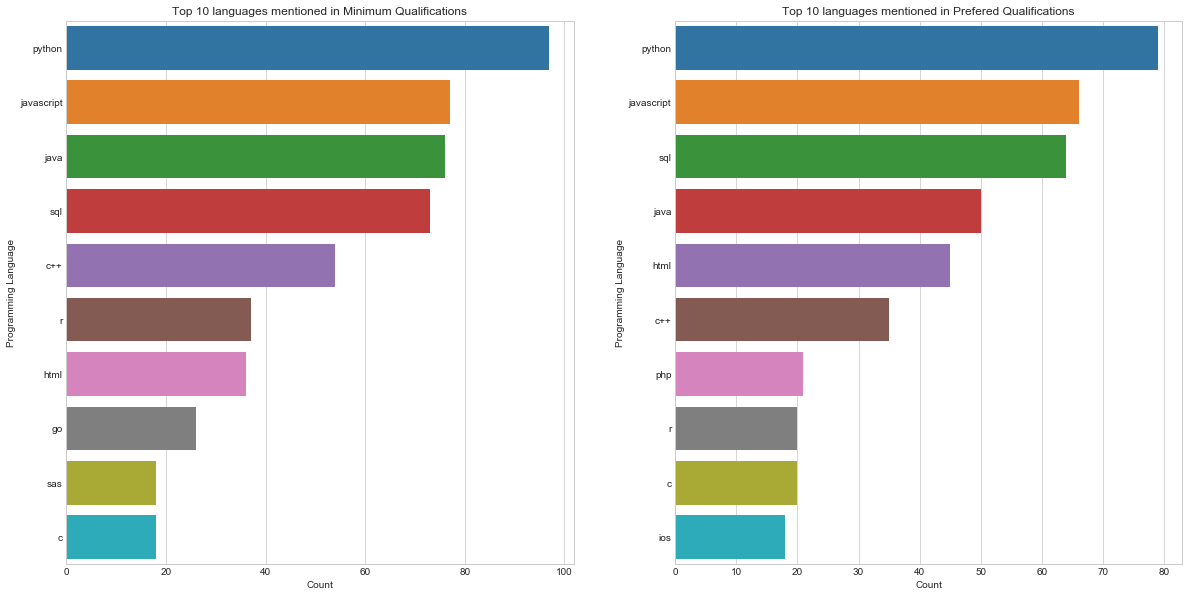

In [14]:
# Visualize the top 10 languages in the minimum qualifications and preferred qualifications
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=language_mini.sort_values(ascending=False).head(10).values, y=language_mini.sort_values(ascending=False).head(10).index, orient='h')
plt.title('Top 10 languages mentioned in Minimum Qualifications')
plt.xlabel('Count')
plt.ylabel('Programming Language')

plt.subplot(1,2,2)
sns.barplot(x=language_prefer.sort_values(ascending=False).head(10).values, y=language_prefer.sort_values(ascending=False).head(10).index, orient='h')
plt.title('Top 10 languages mentioned in Prefered Qualifications')
plt.xlabel('Count')
plt.ylabel('Programming Language')

From the plot, we can see that python, java, javascript, sql are the top 4 languages in the minimum and preferred qualifications

### 3.5 Check the degree needed at Google

    1. phd: includes phd, Ph.D., doctor, M.D., DDS
    2. master: for master, ma, M.A., ms, M.S., mba, MFA 
    3. bachelor: for bs,B.S., ba, B.A.,  bachelor, BFA, BAS 
    4. Associate: for Associate of Arts (A.A.), Associate of Science (A.S.), Associate of Applied Science (AAS), high school

In [15]:
degree_mini=dict((val, 0) for val in ['phd', 'master', 'bachelor', 'associate', 'no degree'])
degree_mini

{'phd': 0, 'master': 0, 'bachelor': 0, 'associate': 0, 'no degree': 0}

In [16]:
# Create list for the degrees
phd=['phd', 'ph.d', 'doctor', 'm.d.', 'dds']
master=['master', 'ma', 'm.a.', 'ms', 'm.s.', 'mba', 'mfa']
bachelor=['bachelor', 'bs', 'b.s.', 'ba', 'b.a.', 'bfa', 'bas']
associate=['associate', 'a.a.', 'a.s.', 'aas', 'high school']

degree_mini=dict((val, 0) for val in ['phd', 'master', 'bachelor', 'associate'])
degree_prefer=dict((val, 0) for val in ['phd', 'master', 'bachelor', 'associate'])

mini=skills['Minimum Qualifications'].str.lower()
prefer=skills['Preferred Qualifications'].str.lower()


for i in range(len(mini)):
    for degree in re.findall(r"[\w'+#-]+|[.!?;’]", str(mini[i])):
        if degree in phd:
            degree_mini['phd']+=1
        elif degree in master:
            degree_mini['master']+=1
        elif degree in bachelor:
            degree_mini['bachelor']+=1
        elif degree in associate:
            degree_mini['associate']+=1
        
       
degree_mini=pd.Series(degree_mini)  
degree_mini

phd             8
master        115
bachelor     1732
associate       1
dtype: int64

In [17]:
for i in range(len(prefer)):
    for degree in re.findall(r"[\w'+#-]+|[.!?;’]", str(prefer[i])):
        if degree in phd:
            degree_prefer['phd']+=1
        elif degree in master:
            degree_prefer['master']+=1
        elif degree in bachelor:
            degree_prefer['bachelor']+=1
        elif degree in associate:
            degree_prefer['associate']+=1
        
       
degree_prefer=pd.Series(degree_prefer)  
degree_prefer

phd           68
master       310
bachelor      40
associate      1
dtype: int64

Text(0,0.5,'Degree')

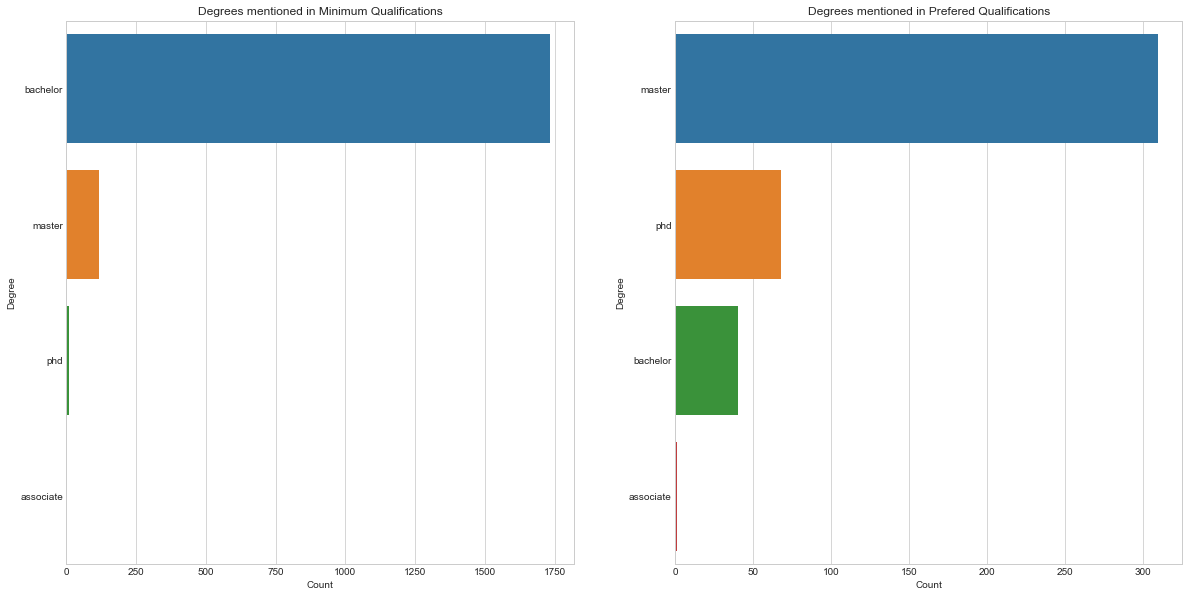

In [18]:
# Visualize the degree in the minimum qualifications and preferred qualifications
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=degree_mini.sort_values(ascending=False).values, y=degree_mini.sort_values(ascending=False).index, orient='h')
plt.title('Degrees mentioned in Minimum Qualifications')
plt.xlabel('Count')
plt.ylabel('Degree')

plt.subplot(1,2,2)
sns.barplot(x=degree_prefer.sort_values(ascending=False).values, y=degree_prefer.sort_values(ascending=False).index, orient='h')
plt.title('Degrees mentioned in Prefered Qualifications')
plt.xlabel('Count')
plt.ylabel('Degree')

From the visualization, although bachelor is required most in the minimum qualifications, Google prefer to hire master and phd degree.

### 3.6 Check the number of years experience needed at Google

Compare for the years of experience in the minimum qualifications and prefered qualifications

In [19]:
mini_string=" ".join(str(i) for i in mini)
prefer_string=" ".join(str(i) for i in prefer)

In [20]:
# the code to find number of years refer to  https://www.kaggle.com/niyamatalmass/what-you-need-to-get-a-job-at-google

from collections import defaultdict
years_exp_mini = defaultdict(lambda: 0)
years_exp_prefer = defaultdict(lambda: 0)
for w in re.findall(r'([0-9]+) year', mini_string):
     years_exp_mini[w] += 1
for w in re.findall(r'([0-9]+) year', prefer_string):
     years_exp_prefer[w] += 1
        
print(years_exp_mini)
print(years_exp_prefer)

defaultdict(<function <lambda> at 0x000002D58AC45048>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})
defaultdict(<function <lambda> at 0x000002D58B0721E0>, {'5': 49, '8': 11, '10': 49, '2': 31, '4': 20, '15': 4, '3': 16, '7': 11, '1': 13, '6': 8, '12': 6, '9': 1})


In [21]:
years_exp_mini=pd.Series(years_exp_mini).sort_values(ascending=False)  
years_exp_prefer=pd.Series(years_exp_prefer).sort_values(ascending=False)  

Text(0,0.5,'Years of Experience')

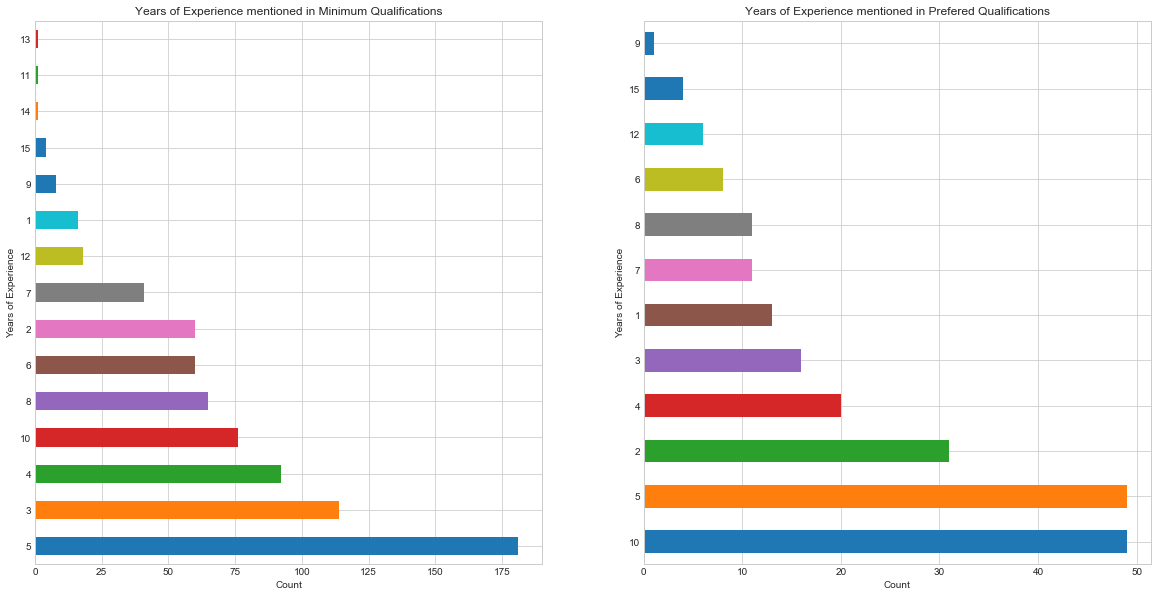

In [22]:
# Visualize the years of experience in the minimum qualifications and preferred qualifications
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
years_exp_mini.plot.barh(x=years_exp_mini.values, y=years_exp_mini.index)
plt.title('Years of Experience mentioned in Minimum Qualifications')
plt.xlabel('Count')
plt.ylabel('Years of Experience')

plt.subplot(1,2,2)
years_exp_prefer.plot.barh(x=years_exp_prefer.values, y=years_exp_prefer.index)
plt.title('Years of Experience mentioned in Prefered Qualifications')
plt.xlabel('Count')
plt.ylabel('Years of Experience')

From the barplot, we can see that the numbers of years required most in the minimum qualifications is 5 years. However, in the preferred qualifications, the years of experience required are 10 years and 5 years.

Thank you for reading this kernel. If you think my kernel is helpful, please give me a voteup. Thanks.